In [1]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# RESNET

In [2]:
resnet = ResNet50(include_top=False, pooling='avg')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
resnet_model = Sequential()
resnet_model.add(resnet)

In [4]:
resnet_model.add(Dense(1, ))

In [5]:
print (resnet_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


In [6]:
resnet_model.load_weights("model_save/Resnet50.h5")

# DENSENET

In [7]:
from tensorflow.python.keras.applications import DenseNet201
densenet = DenseNet201(include_top=False, pooling='avg')

In [8]:
densenet_model = Sequential()
densenet_model.add(densenet)

In [9]:
densenet_model.add(Dense(1, ))

In [10]:
print (densenet_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 1920)              18321984  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1921      
Total params: 18,323,905
Trainable params: 18,094,849
Non-trainable params: 229,056
_________________________________________________________________
None


In [11]:
densenet_model.load_weights("model_save/DenseNet.h5")

# MOBILENET

In [12]:
from tensorflow.python.keras.applications import MobileNetV2
mobilenet = MobileNetV2(include_top=False, pooling='avg')

/usr/local/lib/python3.5/dist-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [13]:
mobilenet_model = Sequential()
mobilenet_model.add(mobilenet)

In [14]:
mobilenet_model.add(Dense(1, ))

In [15]:
print (mobilenet_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________
None


In [16]:
mobilenet_model.load_weights("model_save/Mobilenet.h5")

# Importation des données

In [17]:
import logging
logging.basicConfig(level=logging.WARNING)

import math
import os
import random
import collections

import numpy as np
from numpy.lib.stride_tricks import as_strided

import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten, Reshape, Activation, concatenate
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LambdaCallback, ModelCheckpoint
#from keras.applications.densenet import DenseNet169

from keras.preprocessing import image
from PIL import Image
# import cv2
from skimage.restoration import denoise_wavelet

from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.dpi']= 150

import pandas as pd
# from tqdm import tqdm_notebook

Using TensorFlow backend.


In [18]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

from keras import backend as K
from keras.models import Model
from keras.layers import Activation
from keras.layers import AveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Concatenate
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.utils import get_file
from keras.utils import get_source_inputs
from keras.applications import imagenet_utils
from keras.applications.imagenet_utils import decode_predictions
from keras_applications.imagenet_utils import _obtain_input_shape

In [19]:
DIR = './data/SCUT-FBP5500_v2/'

In [20]:
import pandas as pd
import xlrd

In [21]:
df = pd.read_excel(DIR + 'All_Ratings.xlsx')

In [22]:
from collections import defaultdict
import numpy as np
all_images = defaultdict(list)
for filename, rating in df[['Filename', 'Rating']].values:
    all_images[filename].append(rating)
for filename, rating in df[['Filename', 'Rating']].values:
    all_images[filename].append(rating)
data = {}
for filename, ratings in all_images.items():
    data[filename] = np.mean(ratings)
ratings = dict(data)

In [23]:
import os
from keras.preprocessing import image
images = []
ys = []
for filename in os.listdir(DIR + '/Images'):
    img_path = DIR + '/Images/' + filename
    img=image.load_img(img_path)
    img=image.img_to_array(img)
    images.append(img)
    ys.append(ratings[filename])
    

In [24]:
import matplotlib.pyplot as plt
import random
all_data = pd.DataFrame(data={'image': images, 'rating': ys})

In [25]:
train_size = int(len(all_data)*0.8)
train_data = all_data[:train_size]
test_data = all_data[train_size:]

train_images = train_data['image']
train_ys = train_data['rating']

train_images = list(train_images)
train_ys = list(train_ys)

test_images = test_data['image']
test_ys = test_data['rating']
test_images = list(test_images)
test_ys = list(test_ys)

train_X = np.array(train_images)
train_Y = np.array(train_ys)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_Y.reshape(-1, 1))
train_Y = scaler.transform(train_Y.reshape(-1, 1))
test_X = np.array(test_images)
test_Y = np.array(test_ys)
test_Y = scaler.transform(test_Y.reshape(-1, 1))

# Comparaison des modèles

In [27]:
resnet_predict = scaler.inverse_transform(resnet_model.predict(test_X))
densenet_predict = scaler.inverse_transform(densenet_model.predict(test_X))
mobilenet_predict = scaler.inverse_transform(mobilenet_model.predict(test_X))
Y = scaler.inverse_transform(test_Y)

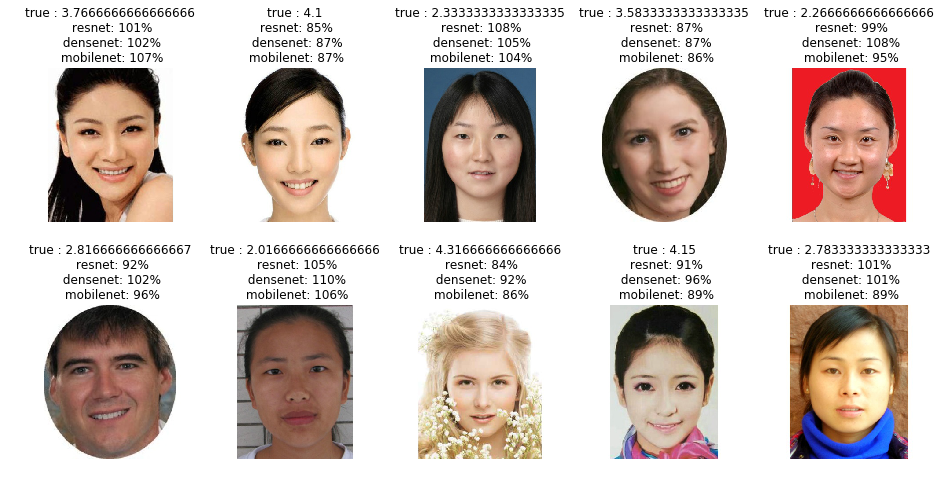

In [28]:
import random
random_select = random.sample(range(len(test_Y)),10)
plt.figure(figsize=(16, 8))
m = 1
for i in random_select:
    plt.subplot(2,5,m)
    img = test_X[i]
    plt.imshow(img/255, interpolation='nearest')
    plt.title('true : '+str(Y[i][0])
              +'\n resnet: '+str(int(resnet_predict[i][0]/Y[i][0]*100))+"%"
              +'\n densenet: '+str(int(densenet_predict[i][0]/Y[i][0]*100))+"%"
              +'\n mobilenet: '+str(int(mobilenet_predict[i][0]/Y[i][0]*100))+"%"
             )
    plt.axis('off')
    m = m+1
    

In [29]:
Y_1D = [float(x[0]) for x in Y]

In [30]:
q = pd.qcut(Y_1D, 10)

In [31]:
inter =[q[16],q[0],q[5],q[3],q[6],q[2],q[18],q[8],q[20],q[4]]

In [32]:
for i in range(0,10):
    globals()['dec{}'.format(i)] = []
    for x in range(len(Y_1D)):
        if Y_1D[x] in inter[i]:
            globals()['dec{}'.format(i)].append(np.int(resnet_predict[x][0]/Y_1D[x]*100))
resnet_m0 = np.array(dec0).mean()
resnet_m1 = np.array(dec1).mean()
resnet_m2 = np.array(dec2).mean()
resnet_m3 = np.array(dec3).mean()
resnet_m4 = np.array(dec4).mean()
resnet_m5 = np.array(dec5).mean()
resnet_m6 = np.array(dec6).mean()
resnet_m7 = np.array(dec7).mean()
resnet_m8 = np.array(dec8).mean()
resnet_m9 = np.array(dec9).mean()

In [33]:
for i in range(0,10):
    globals()['dec{}'.format(i)] = []
    for x in range(len(Y_1D)):
        if Y_1D[x] in inter[i]:
            globals()['dec{}'.format(i)].append(np.int(densenet_predict[x][0]/Y_1D[x]*100))
densenet_m0 = np.array(dec0).mean()
densenet_m1 = np.array(dec1).mean()
densenet_m2 = np.array(dec2).mean()
densenet_m3 = np.array(dec3).mean()
densenet_m4 = np.array(dec4).mean()
densenet_m5 = np.array(dec5).mean()
densenet_m6 = np.array(dec6).mean()
densenet_m7 = np.array(dec7).mean()
densenet_m8 = np.array(dec8).mean()
densenet_m9 = np.array(dec9).mean()

In [34]:
for i in range(0,10):
    globals()['dec{}'.format(i)] = []
    for x in range(len(Y_1D)):
        if Y_1D[x] in inter[i]:
            globals()['dec{}'.format(i)].append(np.int(mobilenet_predict[x][0]/Y_1D[x]*100))
mobilenet_m0 = np.array(dec0).mean()
mobilenet_m1 = np.array(dec1).mean()
mobilenet_m2 = np.array(dec2).mean()
mobilenet_m3 = np.array(dec3).mean()
mobilenet_m4 = np.array(dec4).mean()
mobilenet_m5 = np.array(dec5).mean()
mobilenet_m6 = np.array(dec6).mean()
mobilenet_m7 = np.array(dec7).mean()
mobilenet_m8 = np.array(dec8).mean()
mobilenet_m9 = np.array(dec9).mean()

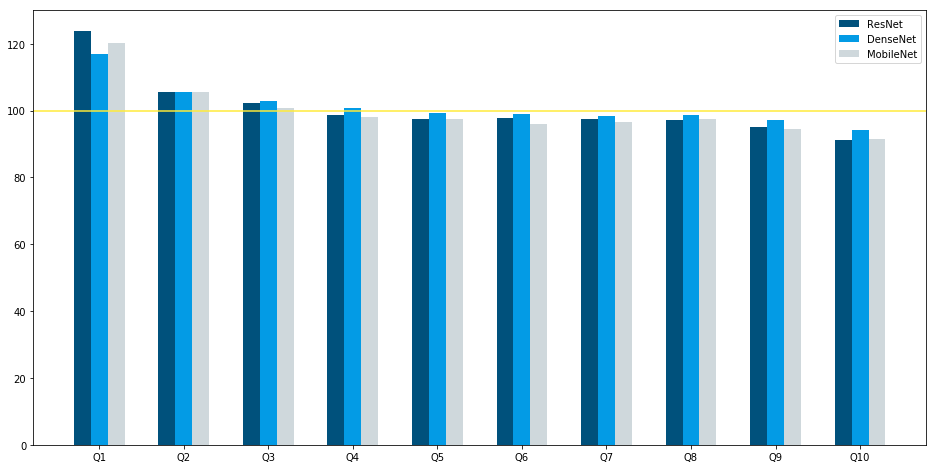

In [35]:
import matplotlib.pyplot as plt

quant = np.arange(1,11)
resnet_m = [resnet_m0,resnet_m1,resnet_m2,resnet_m3,resnet_m4,resnet_m5,resnet_m6,resnet_m7,resnet_m8,resnet_m9]
densenet_m = [densenet_m0,densenet_m1,densenet_m2,densenet_m3,densenet_m4,densenet_m5,densenet_m6,densenet_m7,densenet_m8,densenet_m9]
mobilenet_m = [mobilenet_m0,mobilenet_m1,mobilenet_m2,mobilenet_m3,mobilenet_m4,mobilenet_m5,mobilenet_m6,mobilenet_m7,mobilenet_m8,mobilenet_m9]

plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
ax.bar(quant-0.2, resnet_m, width=0.2, color='#00517c', align='center',label='ResNet')
ax.bar(quant, densenet_m, width=0.2, color='#039be5', align='center',label='DenseNet')
ax.bar(quant+0.2, mobilenet_m, width=0.2, color='#cfd8dc', align='center',label='MobileNet')
plt.axhline(y=100, color='#ffeb38', linestyle='-')
plt.legend()
plt.xticks(np.arange(1,11), ('Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'))
plt.show()

# Comparatif des DenseNets

## DenseNet16

In [25]:
from tensorflow.python.keras.applications import DenseNet201
densenet16 = DenseNet201(include_top=False, pooling='avg')
densenet16_model = Sequential()
densenet16_model.add(densenet16)
densenet16_model.add(Dense(16,activation='relu' ))
densenet16_model.add(Dense(1, ))
print (densenet16_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 1920)              18321984  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                30736     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 18,352,737
Trainable params: 18,123,681
Non-trainable params: 229,056
_________________________________________________________________
None


In [34]:
densenet16_model.load_weights("model_save/DenseNetD16.h5")

## DenseNet64

In [28]:
from tensorflow.python.keras.applications import DenseNet201
densenet64 = DenseNet201(include_top=False, pooling='avg')
densenet64_model = Sequential()
densenet64_model.add(densenet64)
densenet64_model.add(Dense(64,activation='relu' ))
densenet64_model.add(Dense(32,activation='relu' ))
densenet64_model.add(Dense(16,activation='relu' ))
densenet64_model.add(Dense(1, ))
print (densenet64_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 1920)              18321984  
_________________________________________________________________
dense_4 (Dense)              (None, 64)                122944    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 18,447,553
Trainable params: 18,218,497
Non-trainable params: 229,056
_________________________________________________________________
None


In [29]:
densenet64_model.load_weights("model_save/DenseNetD64_32_16.h5")

## DenseNet8

In [32]:
from tensorflow.python.keras.applications import DenseNet201
densenet8 = DenseNet201(include_top=False, pooling='avg')
densenet8_model = Sequential()
densenet8_model.add(densenet8)
densenet8_model.add(Dense(8,activation='relu' ))
densenet8_model.add(Dense(1, ))
print (densenet8_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 1920)              18321984  
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 15368     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 18,337,361
Trainable params: 18,108,305
Non-trainable params: 229,056
_________________________________________________________________
None


In [33]:
densenet8_model.load_weights("model_save/DenseNetD8.h5")

## Comparaison des DenseNets

In [35]:
densenet_predict = scaler.inverse_transform(densenet_model.predict(test_X))
densenet16_predict = scaler.inverse_transform(densenet16_model.predict(test_X))
densenet64_predict = scaler.inverse_transform(densenet64_model.predict(test_X))
densenet8_predict = scaler.inverse_transform(densenet8_model.predict(test_X))

Y = scaler.inverse_transform(test_Y)

In [40]:
for i in range(0,10):
    globals()['dec{}'.format(i)] = []
    for x in range(len(Y_1D)):
        if Y_1D[x] in inter[i]:
            globals()['dec{}'.format(i)].append(np.int(densenet_predict[x][0]/Y_1D[x]*100))
desnet_m0 = np.array(dec0).mean()
desnet_m1 = np.array(dec1).mean()
desnet_m2 = np.array(dec2).mean()
desnet_m3 = np.array(dec3).mean()
desnet_m4 = np.array(dec4).mean()
desnet_m5 = np.array(dec5).mean()
desnet_m6 = np.array(dec6).mean()
desnet_m7 = np.array(dec7).mean()
desnet_m8 = np.array(dec8).mean()
desnet_m9 = np.array(dec9).mean()

In [41]:
for i in range(0,10):
    globals()['dec{}'.format(i)] = []
    for x in range(len(Y_1D)):
        if Y_1D[x] in inter[i]:
            globals()['dec{}'.format(i)].append(np.int(densenet16_predict[x][0]/Y_1D[x]*100))
desnet16_m0 = np.array(dec0).mean()
desnet16_m1 = np.array(dec1).mean()
desnet16_m2 = np.array(dec2).mean()
desnet16_m3 = np.array(dec3).mean()
desnet16_m4 = np.array(dec4).mean()
desnet16_m5 = np.array(dec5).mean()
desnet16_m6 = np.array(dec6).mean()
desnet16_m7 = np.array(dec7).mean()
desnet16_m8 = np.array(dec8).mean()
desnet16_m9 = np.array(dec9).mean()

In [42]:
for i in range(0,10):
    globals()['dec{}'.format(i)] = []
    for x in range(len(Y_1D)):
        if Y_1D[x] in inter[i]:
            globals()['dec{}'.format(i)].append(np.int(densenet64_predict[x][0]/Y_1D[x]*100))
desnet64_m0 = np.array(dec0).mean()
desnet64_m1 = np.array(dec1).mean()
desnet64_m2 = np.array(dec2).mean()
desnet64_m3 = np.array(dec3).mean()
desnet64_m4 = np.array(dec4).mean()
desnet64_m5 = np.array(dec5).mean()
desnet64_m6 = np.array(dec6).mean()
desnet64_m7 = np.array(dec7).mean()
desnet64_m8 = np.array(dec8).mean()
desnet64_m9 = np.array(dec9).mean()

In [43]:
for i in range(0,10):
    globals()['dec{}'.format(i)] = []
    for x in range(len(Y_1D)):
        if Y_1D[x] in inter[i]:
            globals()['dec{}'.format(i)].append(np.int(densenet8_predict[x][0]/Y_1D[x]*100))
desnet8_m0 = np.array(dec0).mean()
desnet8_m1 = np.array(dec1).mean()
desnet8_m2 = np.array(dec2).mean()
desnet8_m3 = np.array(dec3).mean()
desnet8_m4 = np.array(dec4).mean()
desnet8_m5 = np.array(dec5).mean()
desnet8_m6 = np.array(dec6).mean()
desnet8_m7 = np.array(dec7).mean()
desnet8_m8 = np.array(dec8).mean()
desnet8_m9 = np.array(dec9).mean()

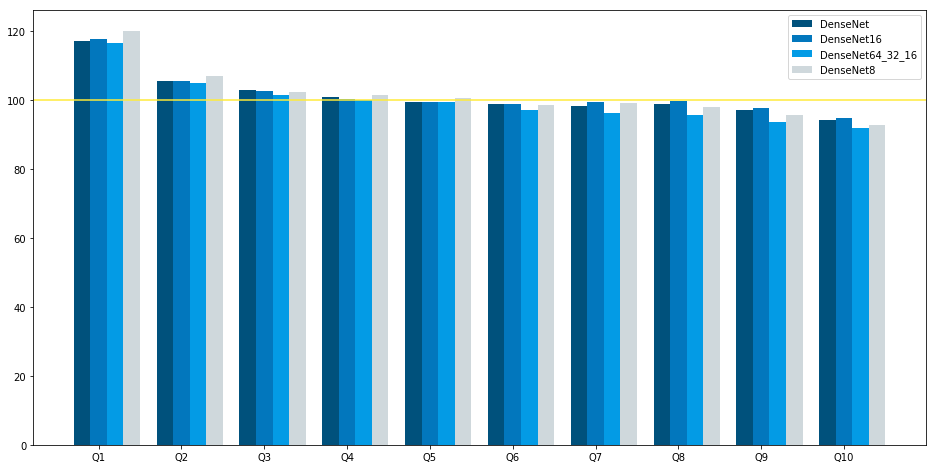

In [45]:
import matplotlib.pyplot as plt

quant = np.arange(1,11)
desnet_m = [desnet_m0,desnet_m1,desnet_m2,desnet_m3,desnet_m4,desnet_m5,desnet_m6,desnet_m7,desnet_m8,desnet_m9]
desnet16_m = [desnet16_m0,desnet16_m1,desnet16_m2,desnet16_m3,desnet16_m4,desnet16_m5,desnet16_m6,desnet16_m7,desnet16_m8,desnet16_m9]
desnet64_m = [desnet64_m0,desnet64_m1,desnet64_m2,desnet64_m3,desnet64_m4,desnet64_m5,desnet64_m6,desnet64_m7,desnet64_m8,desnet64_m9]
desnet8_m = [desnet8_m0,desnet8_m1,desnet8_m2,desnet8_m3,desnet8_m4,desnet8_m5,desnet8_m6,desnet8_m7,desnet8_m8,desnet8_m9]


plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
ax.bar(quant-0.2, desnet_m, width=0.2, color='#00517c', align='center',label='DenseNet')
ax.bar(quant, desnet16_m, width=0.2, color='#0277bd', align='center',label='DenseNet16')
ax.bar(quant+0.2, desnet64_m, width=0.2, color='#039be5', align='center',label='DenseNet64_32_16')
ax.bar(quant+0.4, desnet8_m, width=0.2, color='#cfd8dc', align='center',label='DenseNet8')
plt.axhline(y=100, color='#ffeb38', linestyle='-')
plt.legend()
plt.xticks(np.arange(1,11), ('Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'))
plt.show()